### Project: Nutrition Data Visualization on 80 cereal products

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Styling

In [3]:
sns.set_theme()

## Numerical Plots
* Distribution: Hist, KDE: Đồ thị phân bổ, Displot
* Bar Plot
* Count Plot
* Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành hàng và cột
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* Join Plot
* Pair Plot
* Heat Map: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một  hiện tượng là màu sắc ở hai chiều

## Distribution Plot
* Univariate distribution of abservations

In [4]:
tips_df = sns.load_dataset("tips")

In [5]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


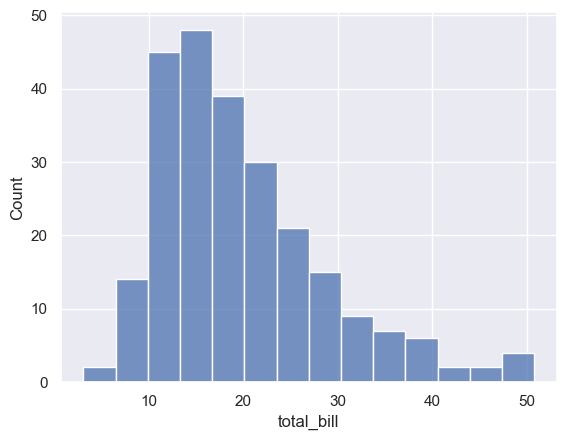

In [6]:
sns.histplot(data=tips_df["total_bill"], );

In [7]:
tips_df["total_bill"].value_counts().sort_values(ascending=False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

### KDE Plot 
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

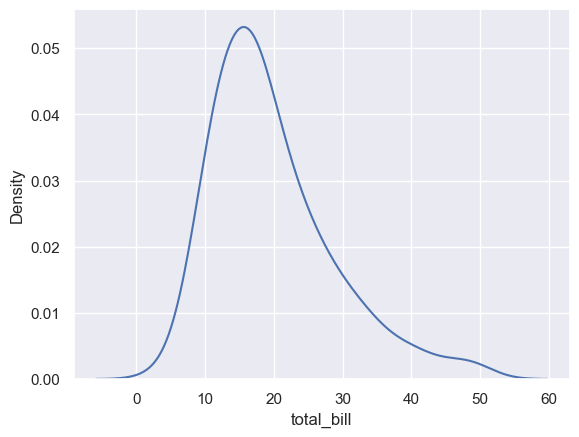

In [8]:
sns.kdeplot(data=tips_df["total_bill"]);

## Displot
* Imformative distributional summaries
Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn funtion displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation ( Nói ngắn gọn là function này là sự kết hợp giữa histogram và KDE để tạo nên 1 cái gọi là informative distributional sumaries )

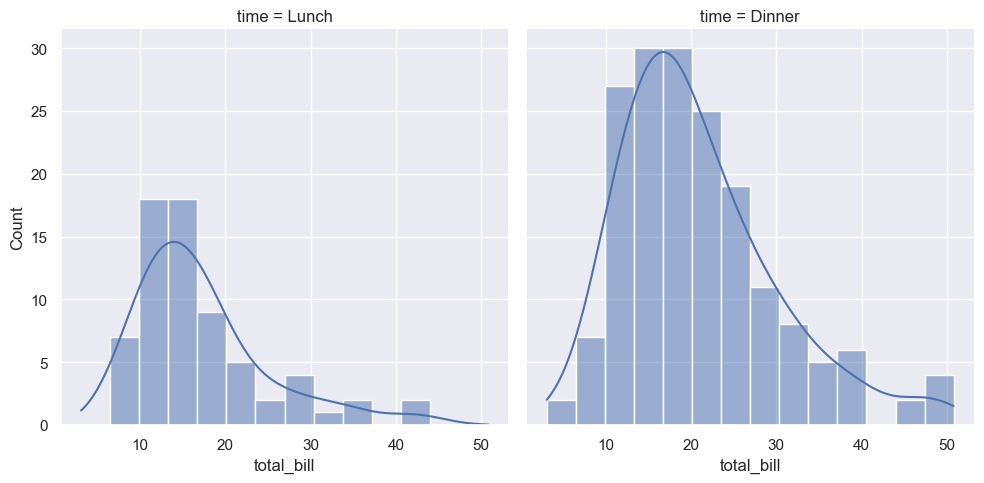

In [9]:
sns.displot(data=tips_df, x=tips_df["total_bill"], col="time", kde=True);

### Project Seaborn

In [10]:
#Read Dataset
raw_data = pd.read_csv("./cereal.csv")

In [11]:
cereal_df =raw_data

In [12]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [13]:
#irrelevant fields

fields = ["shelf", "weight", "cups", "rating"]

cereal_df_new = cereal_df.drop(fields, axis=1)

In [14]:
cereal_df_new

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25


In [15]:
#corr() ---> hàm ma trận tìm ra mối tương quan giữa các data với nhau(chỉ lấy data với type là dữ liệu số)
column_list = ["calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]
cereal_corr = cereal_df_new[column_list].corr()

In [16]:
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [17]:
# ones_like can build martrix of boleans with the same shape as our data

ones_corr = np.ones_like(cereal_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [18]:
# np's triu: return only upper triangle matrix

mask = np.triu(ones_corr,)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

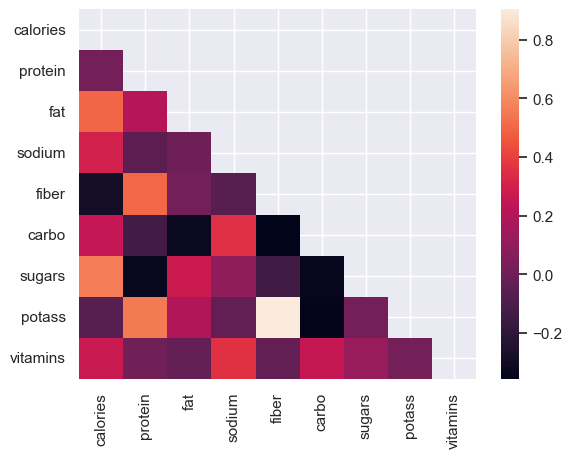

In [19]:
sns.heatmap(data=cereal_corr, mask=mask);

In [20]:
#When removing the upper tri-angle, here are still two empty cells in our matrix(calories & vitamin)

In [21]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [22]:
adjusted_cereal_corr = cereal_corr.iloc[1:,: -1]

In [23]:
adjusted_cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699


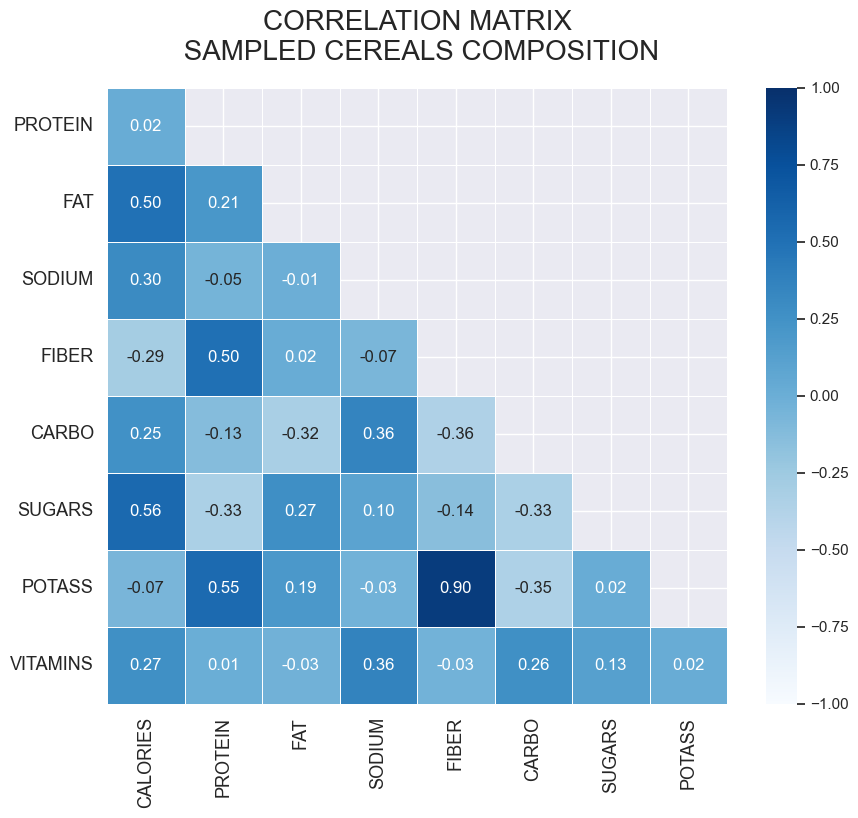

In [24]:
fig, ax = plt.subplots(figsize=(10,8))


sns.heatmap(adjusted_cereal_corr,
            mask=adjusted_mask,
            annot=True, 
            fmt=".2f", 
            cmap="Blues",
            vmin=-1,
            vmax=1, 
            linecolor="white", 
            linewidths=0.5)

yticks = [i.upper() for i in adjusted_cereal_corr.index]
xticks = [i.upper() for i in adjusted_cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13)
ax.set_xticklabels(xticks, rotation=90, fontsize=13)

ax.set_title("CORRELATION MATRIX\n SAMPLED CEREALS COMPOSITION", fontsize=20, pad=20);
